In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
CUR_DATASET = "LIAR-PLUS"

In [40]:
COLUMN_NAMES = ['id', 'label', 'statement', 'subject', 'speaker',
               'speakers_job', 'state_info', 'party_aff', 'bt_cnt',
               'f_cnt', 'ht_cnt', 'mt_cnt', 'pf_cnt', 'context',
               'justification']

In [41]:
train = pd.read_csv(f'./data/{CUR_DATASET}/train2.tsv', sep='\t', names = COLUMN_NAMES)
valid = pd.read_csv(f'./data/{CUR_DATASET}/val2.tsv', sep='\t', names = COLUMN_NAMES)
test = pd.read_csv(f'./data/{CUR_DATASET}/test2.tsv', sep='\t', names = COLUMN_NAMES)

liar_dataset = pd.concat([train, valid, test], axis = 0).reset_index(drop = True)

In [42]:
# train['justification'].fillna('Empty', inplace = True)
# test['justification'].fillna('Empty', inplace = True)
# valid['justification'].fillna('Empty', inplace = True)

# print(train.shape, test.shape, valid.shape)

In [43]:
train['label'].value_counts(), np.array(train['label'].value_counts()) / np.sum(train['label'].value_counts())

(half-true      2114
 false          1995
 mostly-true    1962
 true           1676
 barely-true    1654
 pants-fire      839
 Name: label, dtype: int64,
 array([0.20644531, 0.19482422, 0.19160156, 0.16367187, 0.16152344,
        0.08193359]))

In [44]:
# Nan values counts
train.isna().sum()

id                  2
label               2
statement           2
subject             4
speaker             4
speakers_job     2899
state_info       2210
party_aff           4
bt_cnt              4
f_cnt               4
ht_cnt              4
mt_cnt              4
pf_cnt              4
context           104
justification      88
dtype: int64

In [45]:
def get_top_counts(col):
    COLUMNS = [col, 'counts']
    
    data = pd.DataFrame(np.array([train[col].value_counts().index, train[col].value_counts().values]).T, columns = COLUMNS)
    
    plt.title(f'Top 10 Value Counts for \"{col}\"')
    sns.barplot(x = COLUMNS[1], y = COLUMNS[0], data = data.iloc[:10, :]);

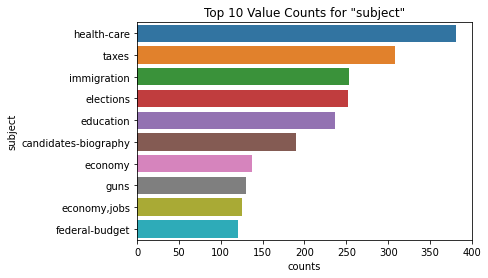

In [46]:
get_top_counts('subject')

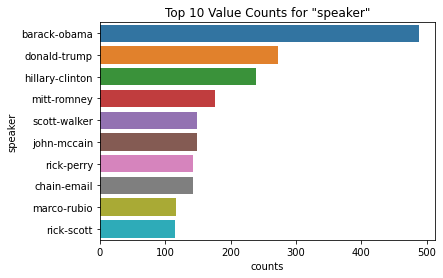

In [47]:
get_top_counts('speaker')

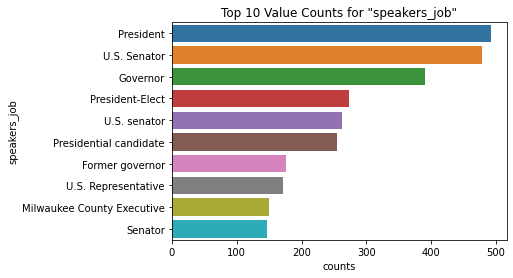

In [48]:
get_top_counts('speakers_job')

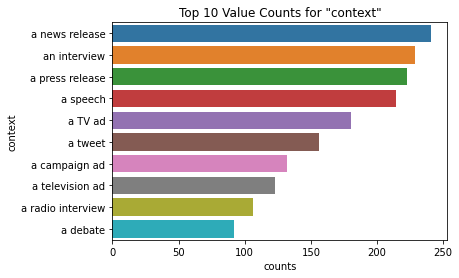

In [49]:
get_top_counts('context')

In [50]:
import random

In [58]:
observation = train
idx = random.randint(0, train.shape[0])
print(f"Statement: {observation['statement'].iloc[idx]}")
print(f"Label: {observation['label'].iloc[idx]}")
print(f'Scores: {observation.iloc[:, 8:13].iloc[idx]}')
print(f"Justification: {observation['justification'].iloc[idx]}")

Statement: Oregon is the only state out of the 50 states in the USA that continues to pay 100% of the medical benefits for its employees and their families.
Label: false
Scores: bt_cnt    0.0
f_cnt     4.0
ht_cnt    1.0
mt_cnt    2.0
pf_cnt    0.0
Name: 480.0, dtype: float64
Justification: Oregon is one of two states that covers a full range of benefits -- health, dental and vision -- but its one of at least four that covers the premiums for its lowest-cost health plan. Richardsons larger point, that Oregon is in a shrinking group of states that do so is certainly a strong and valid one. However, he undercuts his argument by resorting to hyperbole.


In [15]:
from wordcloud import WordCloud, STOPWORDS
import pickle
from tqdm import tqdm

In [16]:
stopwords = set(STOPWORDS)
 
# Source: https://www.kaggle.com/gpreda/jigsaw-eda

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

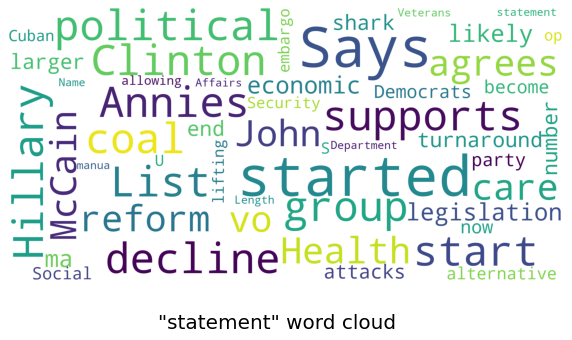

In [18]:
col = 'statement'
show_wordcloud(train[col], f'\"{col}\" word cloud')

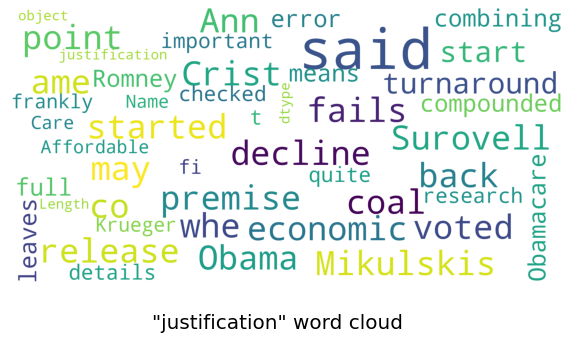

In [19]:
col = 'justification'
show_wordcloud(train[col], f'\"{col}\" word cloud')

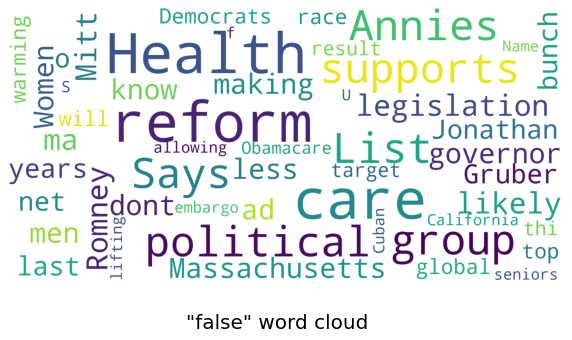

In [21]:
col = "false"
show_wordcloud(train[train['label'] == col]['statement'], f'\"{col}\" word cloud')